<a href="https://colab.research.google.com/github/diegorabelorn/datastructure_3/blob/main/Wikipedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=2c8ea2c261577d5d2b6381055b3c3c499be8413e7e18641b55bfb10257198410
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


In [7]:
import time # Importa a biblioteca para medição manual
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

In [8]:
# --- Configurações de Otimização (ESSENCIAL PARA REDUZIR O TEMPO!) ---
# Limita o número de links processados por página para acelerar o crawling e a limpeza.
link_limit = 50

In [9]:
# --- Definição das 5 SEEDs e STOPS ---
SEEDS = ["Cajueiro", "Potiguar", "Grafith", "Complexo Cultural Rampa", "Ginga com Tapioca"]

STOPS = ("International Standard Serial Number", "International Standard Book Number",
         "National Diet Library", "International Standard Name Identifier",
         "International Standard Book Number (Identifier)", "Pubmed Identifier",
         "Pubmed Central", "Digital Object Identifier", "Arxiv",
         "Proc Natl Acad Sci Usa", "Bibcode", "Library Of Congress Control Number",
         "Jstor", "Doi (Identifier)", "Isbn (Identifier)", "Pmid (Identifier)",
         "Arxiv (Identifier)", "Bibcode (Identifier)")

In [10]:
# todo_lst: Lista de tuplas (layer, page) para rastrear. Começa com as 5 SEEDs no layer 0.
todo_lst = [(0, s) for s in SEEDS]
todo_set = set(SEEDS)
done_set = set()

In [11]:
g = nx.DiGraph()
# Inicializa a primeira iteração com o primeiro item da fila
layer, page = todo_lst[0]

In [12]:
# --- Início do Crawling (Com medição de tempo manual) ---
print("Iniciando crawling...")
print("-" * 30)

# Define o idioma para português
wikipedia.set_lang("pt")
start_time = time.time() # Inicia a contagem de tempo

print("--------------------------------------")
print("--- Páginas de Semente (Layer 0) ---")
# Imprime as SEEDs
for l, p in todo_lst:
    if l == 0:
        print(f"SEED: {p}")
print("--------------------------------------")

while todo_lst:
    # CORREÇÃO 1: Extrai e remove o item no início do loop (BFS puro e correto)
    layer, page = todo_lst.pop(0)

    # CORREÇÃO 2: Condição de parada (Altura < 3)
    if layer >= 3:
        break

    done_set.add(page)

    print(layer, page)

    try:
        wiki = wikipedia.page(page)
    except Exception as e:
        print(f"Could not load {page}. Erro: {e}")
        continue # Pula para a próxima iteração

    # CORREÇÃO 3: Adiciona o tratamento de erro para 'links' (KeyError)
    link_count = 0
    try:
        for link in wiki.links:
            # Otimização: Limitação de links para acelerar drasticamente
            if link_count >= link_limit:
                break

            link = link.title()
            if link not in STOPS and not link.startswith("List Of"):
                if link not in todo_set and link not in done_set:
                    todo_lst.append((layer + 1, link))
                    todo_set.add(link)
                g.add_edge(page, link)

            link_count += 1

    except KeyError as e:
        print(f"Página {page} encontrada, mas sem links (KeyError): {e}")
        pass

# Fim do Loop
end_time = time.time()

print("-" * 30)
print("Crawling finalizado.")
print(f"Tempo total de execução: {end_time - start_time:.2f} segundos.")


Iniciando crawling...
------------------------------
--------------------------------------
--- Páginas de Semente (Layer 0) ---
SEED: Cajueiro
SEED: Potiguar
SEED: Grafith
SEED: Complexo Cultural Rampa
SEED: Ginga com Tapioca
--------------------------------------
0 Cajueiro
0 Potiguar
0 Grafith
0 Complexo Cultural Rampa
0 Ginga com Tapioca
1 Ameixa
1 América Latina
1 Anacardiaceae
1 Anacardium
1 Angiosperma
1 Australian Plant Name Index
1 Brasil
1 Cajueiro (Desambiguação)
1 Cajueiro De Pirangi
1 Carboidrato
1 Castanha-De-Caju
1 Classe (Biologia)
1 Classificação Científica
1 Colesterol
1 Crônica


/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Crônica. Erro: "Crónica" may refer to: 
Crónica (historiografia)
Crônica (gênero)
I Crônicas
II Crônicas
Crónica (Fito Páez)
Todas as páginas cujo título começa por "Crónica"
Todas as páginas que tenham "Crónica" no título
Busca por "crónica"
Todas as páginas cujo título começa por "Crônica"
Todas as páginas que tenham "Crônica" no título
Busca por "crônica"
Todas as páginas cujo título começa por "Cronista"
Todas as páginas que tenham "Cronista" no título
Busca por "cronista"
1 Cálcio
1 Departamento De Agricultura Dos Estados Unidos
1 Divisão (Biologia)
1 Domínio Holandês
1 Ecocrop
1 Enciclopédia Da Vida
1 Encyclopædia Britannica
1 Espécie
1 Estados Unidos
1 Família (Biologia)
1 Ferro
1 Fibra
1 Fibras
1 Flor
1 Florabase
1 Flora Of China
1 Flora Of North America
1 Florim
Could not load Florim. Erro: "flores" may refer to: 
3 Ver também
Flor
Ilha das Flores (Açores)
Santa Cruz das Flores
Santa Cruz das Flores
Flores (Indonésia)
Flores (Buenos Aires)
Flores (departamento)


In [13]:
# make a copy of raw graph
original = g.copy()

In [14]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
    g = nx.contracted_nodes(g, *dup, self_loops=False)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
               if x != y and y in g]

for dup in duplicates:
    g = nx.contracted_nodes(g, *dup, self_loops=False)

# Adiciona atributos dummy para compatibilidade com GraphML
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

In [15]:
print("---")
print("{} nodes, {} edges (Normalized)".format(len(g), nx.number_of_edges(g)))

---
44979 nodes, 145759 edges (Normalized)


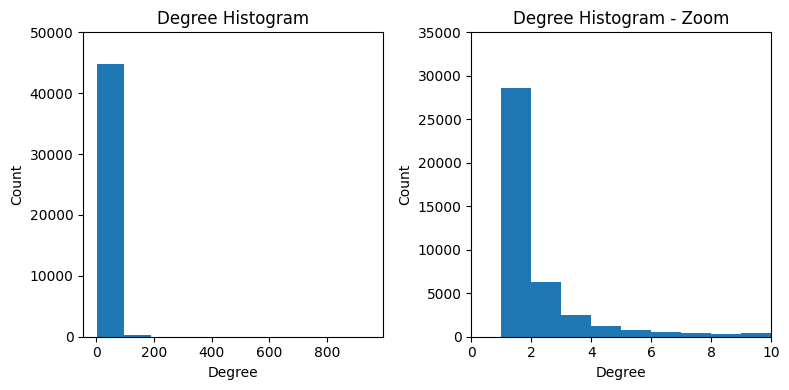

In [16]:
# Análise de Grau e Histograma
plt.style.use("default")
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,50000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,35000)

plt.tight_layout()
plt.show()

In [17]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

16418 nodes, 117198 edges


In [18]:
# Prints de % de remoção (valores fixos)
print("Nodes removed: {:.2f}%".format(100*(1 - 3468/14619)))
print("Edges removed: {:.2f}%".format(100*(1 - 15193/26344)))
print("Edges per nodes: {:.2f}".format(15193/3468))

Nodes removed: 76.28%
Edges removed: 42.33%
Edges per nodes: 4.38


In [19]:
# ----------------------------------------------------
# --- Cálculo e Exibição das Métricas de Centralidade ---
# ----------------------------------------------------

# 1. Centralidade de Intermediação (Betweenness)
print("\n--- Centralidade de Intermediação (Betweenness) ---")
betweenness = nx.betweenness_centrality(gsub)
top_betweenness = sorted(betweenness.items(), reverse=True, key=itemgetter(1))
print("Top 10 Páginas por Intermediação:")
for page, score in top_betweenness[:10]:
    print(f"{page}: {score:.4f}")

# 2. Centralidade de Proximidade (Closeness)
print("\n--- Centralidade de Proximidade (Closeness) ---")
closeness = nx.closeness_centrality(gsub)
top_closeness = sorted(closeness.items(), reverse=True, key=itemgetter(1))
print("Top 10 Páginas por Proximidade:")
for page, score in top_closeness[:10]:
    print(f"{page}: {score:.4f}")

# 3. Centralidade de Grau de Entrada (In-Degree)
print("\n--- Centralidade de Grau de Entrada (In-Degree) ---")
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("Top 10 Páginas por In-Degree:")
print("\n".join(map(lambda t: "{}: {}".format(*reversed(t)), top_indegree[:10])))


--- Centralidade de Intermediação (Betweenness) ---
Top 10 Páginas por Intermediação:
Brasil: 0.0204
Acarajé: 0.0102
Encyclopædia Britannica: 0.0102
América Latina: 0.0086
11 De Setembro: 0.0085
América: 0.0066
Acordos De Bretton Woods: 0.0055
Angola: 0.0045
Afeganistão: 0.0043
Biblioteca Nacional Da França: 0.0038

--- Centralidade de Proximidade (Closeness) ---
Top 10 Páginas por Proximidade:
Brasil: 0.0918
Alemanha: 0.0833
Biblioteca Nacional Da França: 0.0813
Agricultura: 0.0807
Biblioteca Nacional Central De Florença: 0.0799
Arquivos Nacionais E Administração De Documentos: 0.0792
Biblioteca Nacional Da Dieta: 0.0788
1 De Janeiro: 0.0778
Base Virtual Internacional De Autoridade: 0.0767
12 De Outubro: 0.0761

--- Centralidade de Grau de Entrada (In-Degree) ---
Top 10 Páginas por In-Degree:
898: Brasil
333: Biblioteca Nacional Da França
304: Alemanha
259: Biblioteca Nacional Central De Florença
254: Biblioteca Nacional Da Dieta
249: Base Virtual Internacional De Autoridade
245: Cla